# FTR Exercise

## Part 1: Sources with memory

First, import libraries and load Hamlet from file.

In [1]:
f = open('hamlet.txt', 'r')
hamlet = f.read()
f.close()
print(hamlet[:294])

        HAMLET


        DRAMATIS PERSONAE


CLAUDIUS        king of Denmark. (KING CLAUDIUS:)

HAMLET  son to the late, and nephew to the present king.

POLONIUS        lord chamberlain. (LORD POLONIUS:)

HORATIO friend to Hamlet.

LAERTES son to Polonius.

LUCIANUS        nephew to the king.


In [2]:
from math import log2
H = lambda pr: -sum([pr[a]*log2(pr[a]) for a in pr])

In [3]:
h = []
for n in range(1,20):
    p = {}
    for k in range(len(hamlet)-n):
        key = hamlet[k:(k+n)]
        if key in p:
            p[key] += 1
        else:
            p[key] = 1
    totfreq = sum(list(p.values()))
    for a in p:
        p[a] /= totfreq
    h.append(H(p)/n)

In [4]:
hstar = [(k+2)*h[k+1]-(k+1)*h[k] for k in range(len(h)-1)]

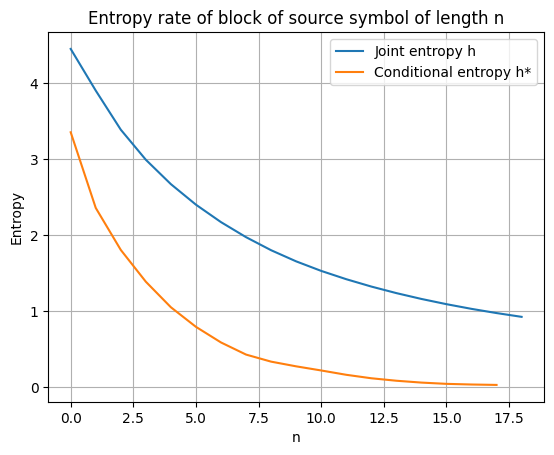

In [11]:
import matplotlib.pyplot as plt

plt.plot(h,label='Joint entropy h')
plt.xlabel('n')
plt.ylabel('Entropy')
plt.title('Entropy rate of block of source symbol of length n')
plt.plot(hstar,label='Conditional entropy h*')
plt.legend()
plt.grid()

## Part 2: Estimating probabilities

First estimate the whole file probabilities of Hamlet so as to get the entropy.

In [21]:
from itertools import groupby
import numpy as np
f_tot = dict([(key, len(list(group))) for key, group in groupby(sorted(hamlet))])
Nin = sum([f_tot[a] for a in f_tot])
p_tot = dict([(a,f_tot[a]/Nin) for a in f_tot])

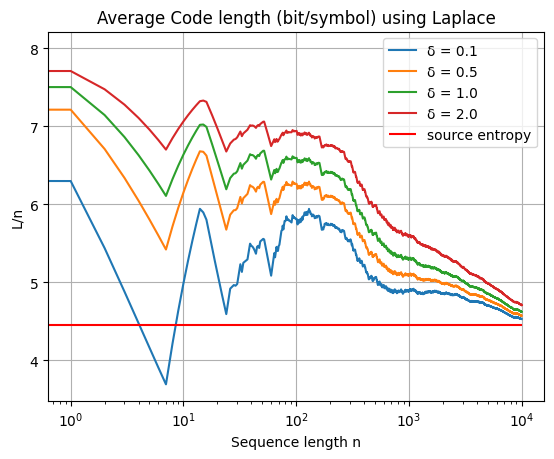

In [28]:
deltas = [0.1,0.5,1.0,2.0]
N = 10000 # length of measurement


for i,delta in enumerate(deltas):
    f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
    Ltot = 0
    Lav = []

    for k in range(N):
        p = [x/sum(f) for x in f]
        # calculate length of codeword portion for next symbol
        Ltot += -log2(p[ord(hamlet[k])])
        # record an average length measurement
        Lav.append(Ltot/(k+1))
        # now update probability table
        f[ord(hamlet[k])] += 1

    
    plt.plot(Lav,label='\u03B4 = {}'.format(delta))
    

plt.xlabel('Sequence length n')
plt.ylabel('L/n')
plt.title('Average Code length (bit/symbol) using Laplace')
plt.hlines(H(p_tot),0,N,colors='r', label='source entropy')
plt.legend(loc='upper right')
plt.xscale("log")
plt.grid()
    

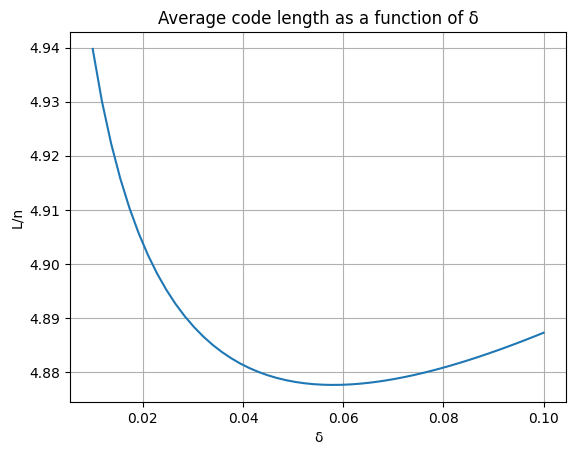

In [20]:

deltas=np.linspace(0.01,0.1,50)
average_code_length=[]
N=1000

for i,delta in enumerate(deltas):
    f = [delta]*256 # initialise 256 (for bytes) frequencies to the value of delta
    Ltot = 0
    Lav = []

    for k in range(N):
        p = [x/sum(f) for x in f]
        # calculate length of codeword portion for next symbol
        Ltot += -log2(p[ord(hamlet[k])])
        # record an average length measurement
        Lav.append(Ltot/(k+1))
        # now update probability table
        f[ord(hamlet[k])] += 1

    average_code_length.append(Lav[-1])
    
plt.plot(deltas,average_code_length)
plt.xlabel('\u03B4')
plt.ylabel('L/n')
plt.title('Average code length as a function of \u03B4')
plt.grid()


